In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
data

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,year,month,hour,temporada_alta,dif_min,atraso_15,periodo_dia,day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,3.0,0,noche,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,9.0,0,noche,2
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,9.0,0,noche,3
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,3.0,0,noche,4
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,-2.0,0,noche,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017,12,14,0,46.0,1,tarde,22
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017,12,14,0,16.0,1,tarde,25
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017,12,14,0,40.0,1,tarde,27
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,2017,12,14,0,13.0,0,tarde,29


In [435]:
# load dataset

def load_data(path):
    data = pd.read_csv(path)
    data['Fecha-I'] = pd.to_datetime(data['Fecha-I'], format="%Y/%m/%d %H:%M:%S")
    data['Fecha-O'] = pd.to_datetime(data['Fecha-O'], format="%Y/%m/%d %H:%M:%S")
    data = data.sort_values(by='Fecha-I')

    return data

load_data('dataset_SCL.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(68206, 26)


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,year,month,hour,temporada_alta,dif_min,atraso_15,periodo_dia,day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,3.0,0,noche,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,9.0,0,noche,2
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,9.0,0,noche,3
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,3.0,0,noche,4
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,2017,1,23,0,-2.0,0,noche,5


In [436]:
def is_temporada_alta(fecha):
    if (
        date(2017, 12, 15) < fecha < date(2017, 3, 3) or
        date(2017, 7, 15) < fecha < date(2017, 7, 31) or
        date(2017, 9, 11) < fecha < date(2017, 9, 30)
        ):
        
        return True
    else:
        return False

def get_minutes_difference(row):
    return (row['Fecha-O']-row['Fecha-I']).total_seconds() / 60


def periodo_dia(hora):
    if hora >= 5 and hora < 12:
        return 'mañana'
    
    elif hora >=12 and hora < 19:
        return 'tarde'
    
    else:
        return 'noche'

def create_feature_dif_min(data):
    df = data.copy()
    df['dif_min'] = df.apply(lambda x: get_minutes_difference(x),axis=1)
    return df

def create_feature_atraso_15(data):
    df = data.copy()
    df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x > 15 else 0)
    
    return df

def create_feature_temporada_alta(data):
    df = data.copy()
    df['temporada_alta'] = data['Fecha-I'].apply(lambda x: 1 if is_temporada_alta(x) else 0)
    
    return df


def create_time_features(data):
    
    df = data.copy()
    
    #df['year'] = pd.DatetimeIndex(data['Fecha-I']).year
    #df['month'] = pd.DatetimeIndex(data['Fecha-I']).month
    df['hour'] = pd.DatetimeIndex(data['Fecha-I']).hour
    #df['day'] = pd.DatetimeIndex(data['Fecha-I']).day


    return df

def create_feature_periodo_dia(data):
    df = data.copy()
    
    df['periodo_dia'] = df['hour'].apply(lambda x: periodo_dia(x)) 
    
    return df

def create_syntethic_features(data):
    df = data.copy()
    
    df = create_feature_temporada_alta(df)
    df = create_feature_dif_min(df)                                     
    df = create_feature_atraso_15(df)
    df = create_feature_periodo_dia(df)
    
    return df

In [437]:
data = create_time_features(data)
data = create_syntethic_features(data)

In [438]:
data.day

0         1
1         2
2         3
3         4
4         5
         ..
68201    22
68202    25
68203    27
68204    29
68205    31
Name: day, Length: 68206, dtype: int64

In [439]:
def save_syntethic_features(data, path):
    SYNTHETIC_FEATURES = ['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']
    
    data[SYNTHETIC_FEATURES].to_csv(path, index=False)
    
    return None

In [440]:
save_syntethic_features(data,'synthetic_features.csv')

## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings
    
6. Additional Reading Resources

## Target (Retraso)

Empecemos por el retraso

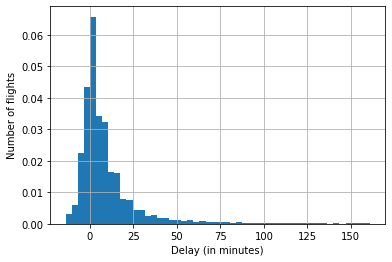

In [441]:
# histogram to evaluate target distribution

data['dif_min'].hist(bins=50, density=True)
plt.ylabel('Number of flights')
plt.xlabel('Delay (in minutes)')
plt.show()

Tal como se espera, la distribución esta centrada en 0 y decae en ambas direcciones. Existe vuelos que no se retrasan, sino que se adelantan.

In [442]:
percent_vuelos_adelantados = round(100*len(data[data.dif_min < 0])/len(data),2) 
print(f'El {percent_vuelos_adelantados}% de los vuelos salen adelantados')

El 26.26% de los vuelos salen adelantados


 La gran mayoría de los retrasos están por debajo de los 50 minutos, pero hay una larga cola que sobrepasa las 2 horas. Sería interesante analizar qué causa estos retrasos más largos.

Si bien en esta notebook se atacará el problema como uno de clasificación, esta larga cola puede causar problemas en un modelo de regresión, por lo que debería aplicarse alguna transformación (p.ej Yeo-Johnson).

Veamos ahora el atraso a 15 minutos

In [443]:
def make_pie_chart(data, var, title=''):

    labels= data[var].value_counts().index
    datas = data[var].value_counts()/len(data)
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(111)
    title = title
    ax.set_title(title)
    pie_wedge_collection = ax.pie(datas, labels=labels, labeldistance=1.05,autopct='%.0f%%')

    for pie_wedge in pie_wedge_collection[0]:
            pie_wedge.set_edgecolor('white')

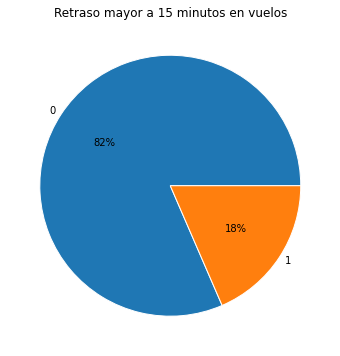

In [444]:
make_pie_chart(data, var= 'atraso_15',title= 'Retraso mayor a 15 minutos en vuelos' )

Como es de esperar, hay un desbalance, no habiendo retraso en la mayoría de los vuelos. Notablemente, hay menos vuelos atrasados que adelantados. El desbalance no es tan grande para aplicar métodos como upsampling (por lo menos en una primera iteración).

Ver: https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

Es de esperar que haya una dependencia entre los retrasos (varios retrasos consecutivos por clima, por ejemplo). Podemos ver si existe una autocorrelación en el target.

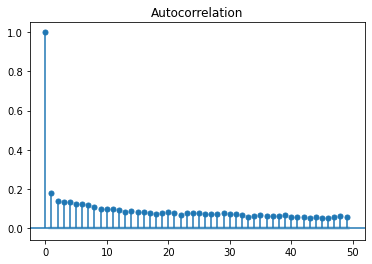

In [445]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(x=data['dif_min'])
plt.show()

Existe una autocorrelación, siempre positiva, pero no tan grande. Se puede pensar agregar una nueva feature que contenga la información de si el vuelo anterior fue retrasado, o bien el promedio del target en las anteriores N horas. Si bien esta información probablemente mejoraría el resultado del modelo, muy posiblemente no sea posible tener este dato en una situación real, o sea, sería necesario disponer de la información de los vuelos inmediatamente anteriores, entrenar y predecir. Por eso, no se agregará esta feature en la notebook. 

# Features

Veamos ahora las features. No todas las del dataset original van a ser usadas porque contienen leaks

# Missing values
Veamos que valores faltan, para saber qué hay que imputar si es necesario, y como se relacionan las variables faltantes con el target.

In [446]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

No faltan datos en el dataset. No hace falta imputar nada.

## Variables discretas

In [447]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'year', 'month', 'hour',
       'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia', 'day'],
      dtype='object')

In [452]:
VARIABLES_DISCRETAS = ['DIA','MES','hour','temporada_alta']

array([[<AxesSubplot:title={'center':'DIA'}>,
        <AxesSubplot:title={'center':'MES'}>],
       [<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'temporada_alta'}>]], dtype=object)

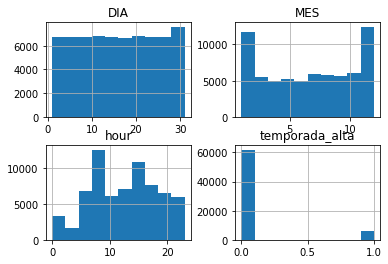

In [455]:
data[VARIABLES_DISCRETAS].hist()

La distribución por día del mes es uniforme, aunque sorprendentemente hay un pequeño aunmento a final de mes. Respecto al mes, final y principio de año son los grandes picos de actividad. Los vuelos durante temporada alta no son tan numerosos como era de esperar, pero son una fracción pequeña de días. Por último, es notable una alta actividad a la mañana (entre 6 y 8) y alrededor de las 15.

Veamos ahora cómo se relacionan con el retraso

Text(0, 0.5, 'retraso (min)')

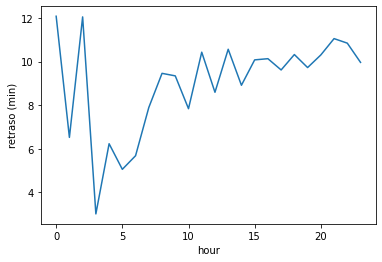

In [457]:
data.groupby('hour').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Text(0, 0.5, 'retraso (min)')

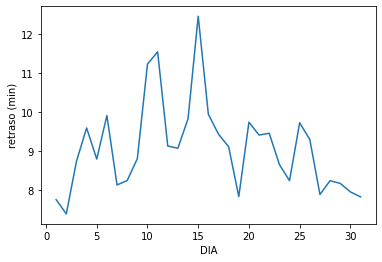

In [458]:
data.groupby('DIA').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')


Text(0, 0.5, 'retraso (min)')

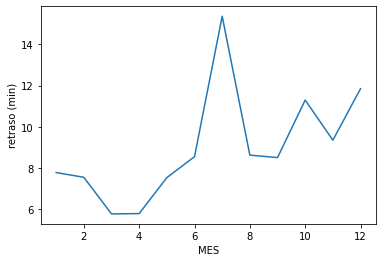

In [459]:
data.groupby('MES').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Text(0, 0.5, 'retraso (min)')

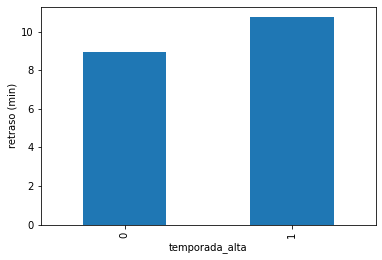

In [460]:
data.groupby('temporada_alta').mean()['dif_min'].plot.bar()
plt.ylabel('retraso (min)')

<AxesSubplot:>

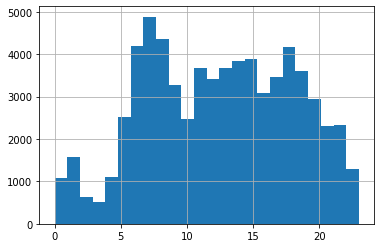

Se ve que en julio hubo un pico de retrasos. Asimismo, en temporada alta hay mayor retraso, así como a mediados del mes. 

## Categorical data 

## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [421]:
VARIABLES_CATEGORICAS = ['OPERA', 'SIGLADES','DIANOM', 'TIPOVUELO','Vlo-I', 'Ori-I', 'Des-I', 'Emp-I','Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O']

In [422]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'year', 'month', 'hour',
       'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia', 'day'],
      dtype='object')

<AxesSubplot:>

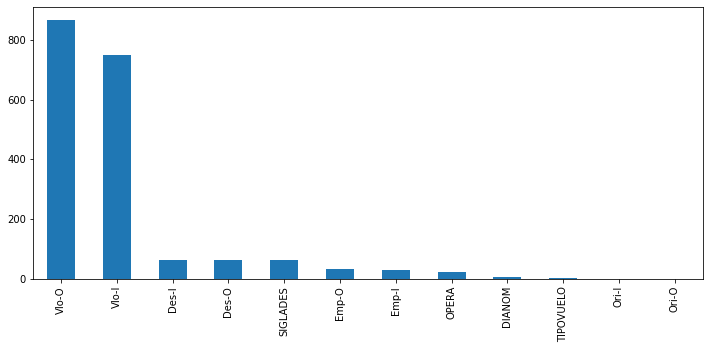

In [423]:
# we count unique categories with pandas unique() 
# and then plot them in descending order
data[VARIABLES_CATEGORICAS].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

Hay categorías de cardinalidad muy alta. Usar un OneHotEncoder puede ser muy pesado. Saquemos esas dos para ver mejor las otras


In [424]:
CAT_REDUCED=['OPERA', 'SIGLADES','DIANOM', 'TIPOVUELO', 'Ori-I', 'Des-I', 'Emp-I',
       'Ori-O', 'Des-O', 'Emp-O']

In [ ]:
data[CAT_REDUCED].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [ ]:
# How many games in each category? Rest days & travel.
temp_grp_df = box_df.groupby(['rest_cats', 'atraso_15']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(travelled=temp_grp_df.travelled.astype(str))
fig = px.bar(temp_grp_df, y='rest_cats', x='outcome', orientation='h', color='travelled', barmode='group')
fig.show()

In [ ]:
for cat in VARIABLES_CATEGORICAS:
    data.groupby(cat).mean()['atraso_15'].sort_values(by='atraso_15').plot.barh(figsize=(12,5))

In [499]:
VARIABLES_CATEGORICAS

['OPERA',
 'SIGLADES',
 'DIANOM',
 'TIPOVUELO',
 'Vlo-I',
 'Ori-I',
 'Des-I',
 'Emp-I',
 'Vlo-O',
 'Ori-O',
 'Des-O',
 'Emp-O']

<AxesSubplot:ylabel='OPERA'>

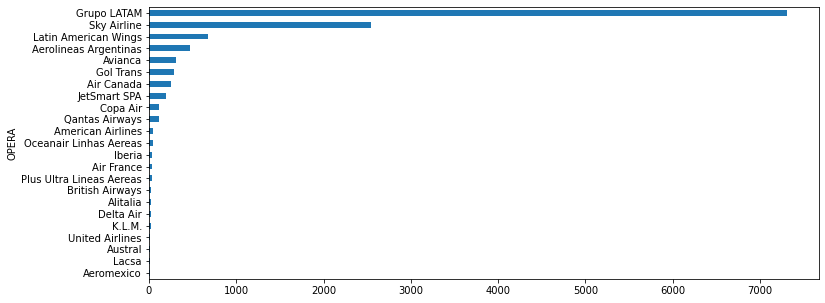

In [514]:
data.groupby('OPERA').sum()['atraso_15'].sort_values(axis=0,ascending=True).plot.barh(figsize=(12,5))

<AxesSubplot:ylabel='OPERA'>

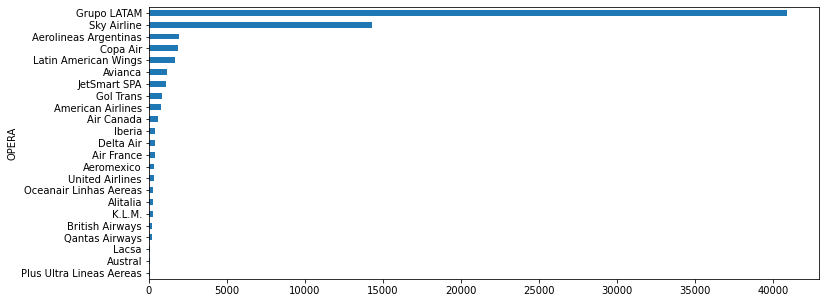

In [515]:
data.groupby('OPERA').count()['atraso_15'].sort_values(axis=0,ascending=True).plot.barh(figsize=(12,5))

<AxesSubplot:ylabel='OPERA'>

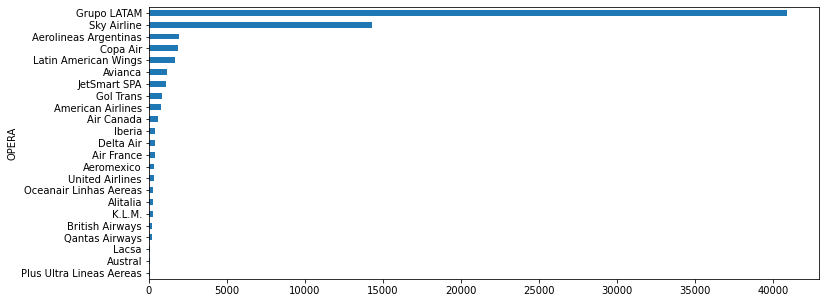

In [513]:
data.groupby('OPERA').sum()['atraso_15'].sort_values(axis=0,ascending=True).plot.barh(figsize=(12,5))

<AxesSubplot:ylabel='SIGLADES'>

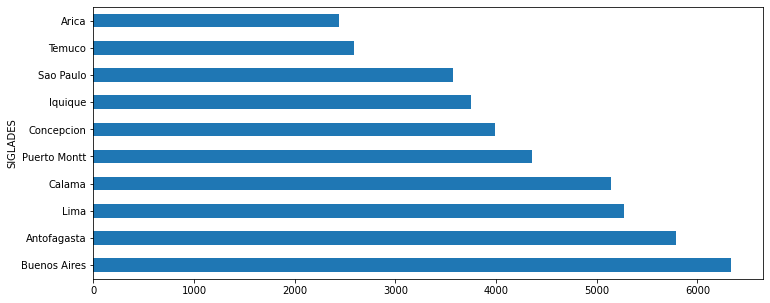

In [510]:
data.groupby('SIGLADES').count()['atraso_15'].sort_values(axis=0,ascending=False)[:10].plot.barh(figsize=(12,5))

# Difference I/O

Se puede suponer que el si hubo un cambio respecto a lo programado, puede haber alguna causa de fondo que cause un retraso.
Veamos primero el retraso promedio

In [465]:
retraso_promedio = data.atraso_15.mean()
print(f'Retraso promedio: {retraso_promedio} min')

Retraso promedio: 0.18493974137172683 min


In [476]:
retraso_promedio = data[data['Des-O']!=data['Des-I']].atraso_15.mean()
print(f'Retraso promedio ante cambio de destino: {retraso_promedio} min')

Retraso promedio ante cambio de destino: 0.2857142857142857 min


In [477]:
retraso = data[data['Vlo-O']!=data['Vlo-I']].atraso_15.mean()
print(f'Retraso promedio ante cambio de nro de vuelo: {retraso} min')

Retraso promedio ante cambio de nro de vuelo: 0.252972972972973 min


In [479]:
retraso = data[data['Emp-O']!=data['Emp-I']].atraso_15.mean()
print(f'Retraso promedio ante cambio de aerolinea: {retraso} min')

Retraso promedio ante cambio de aerolinea: 0.1800310675451283 min


Los cambios en destino y aerolinea reflejan un mayor retraso.

# Posibles mejoras

- tener en cuenta desbalance (ej upsampling, usar metodos de librerias como imblearn)
- usar lstm para tener en cuenta factor de orden temporal
- tomar como problema de regresion

#para hacer despues
agregar LOS CONTEOS SOLOS de las categoricas, sin el 